In [1]:
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive

In [3]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [4]:
!pwd

/content


In [5]:
%cd drive/MyDrive/gutenberg/

/content/drive/MyDrive/gutenberg


In [6]:
!pwd

/content/drive/MyDrive/gutenberg


In [7]:
TEXT = open('austen-emma.txt').read()
TEXT += open('shakespeare-hamlet.txt').read()
TEXT += open('austen-persuasion.txt').read()
TEXT += open('austen-sense.txt').read()
len(TEXT), type(TEXT)

(2189279, str)

In [8]:
def tokens(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[a-z]+', text.lower())

In [11]:
tokens('Hey, I am working with NLTK..!')

['hey', 'i', 'am', 'working', 'with', 'nltk']

In [12]:
WORDS = tokens(TEXT)
# WORDS.append('mathematics')
len(WORDS), type(WORDS)

(397099, list)

In [13]:
print(WORDS[:10])

['emma', 'by', 'jane', 'austen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse']


In [14]:
def sample(bag, n=10):
    "Sample a random n-word sentence from the model described by the bag of words."
    return ' '.join(random.choice(bag) for _ in range(n))

In [15]:
sample(WORDS)

'simple d make tear dignity of and king all you'

In [16]:
Counter(tokens('Hey, this is the third exercise'))

Counter({'exercise': 1, 'hey': 1, 'is': 1, 'the': 1, 'third': 1, 'this': 1})

In [17]:
COUNTS = Counter(WORDS)

print (COUNTS.most_common(10))

[('the', 13631), ('to', 12851), ('and', 12052), ('of', 11045), ('a', 7328), ('i', 6894), ('her', 6340), ('in', 5956), ('it', 5743), ('was', 5682)]


In [18]:
for w in tokens('pound is widely expected to take another sharp drive don done'):
    print (COUNTS[w], w)

1 pound
2729 is
2 widely
97 expected
12851 to
247 take
267 another
7 sharp
23 drive
46 don
310 done


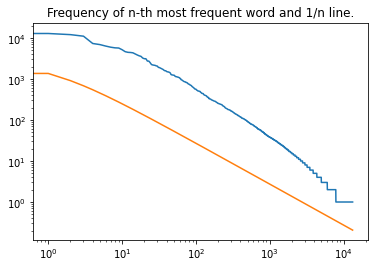

In [19]:
M = COUNTS['is']
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word and 1/n line.')
plot([c for (w, c) in COUNTS.most_common()])
plot([M/i for i in range(1, len(COUNTS)+1)]);

In [47]:
def correct(word):
    "Find the best spelling correction for this word."
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or
                  [word])
    print(type(candidates),candidates, COUNTS.get )
    return max(candidates, key=COUNTS.get)

In [48]:
def known(words):
    "Return the subset of words that are actually in the dictionary."
    return {w for w in words if w in COUNTS}

def edits0(word): 
    "Return all strings that are zero edits away from word (i.e., just word itself)."
    return {word}

def edits2(word):
    "Return all strings that are two edits away from this word."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [49]:
def edits1(word):
    "Return all strings that are one edit away from this word."
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Return a list of all possible (first, rest) pairs that comprise word."
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [82]:
splits('speech')

[('', 'speech'),
 ('s', 'peech'),
 ('sp', 'eech'),
 ('spe', 'ech'),
 ('spee', 'ch'),
 ('speec', 'h'),
 ('speech', '')]

In [51]:
print (edits0('speech'))

{'speech'}


In [84]:
ans = known((edits1('yo')))
# print(ans, COUNTS['the'])
print(ans)
# print(max(ans, key=COUNTS.get))
# print("mathematics" in ans)

{'so', 'yon', 'no', 'go', 'ye', 'co', 'o', 'you', 'y', 'ho', 'do', 'to', 'ro'}


In [63]:
print(known(('mathematics')))
print(COUNTS['mathematics'])

set()
1


In [53]:
print (len(edits2('speech')))

51013


In [54]:
map(correct, tokens('speech eis not good'))

In [55]:
def correct_text(text):
    "Correct all the words within a text, returning the corrected text."
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    "Spell-correct word in match, and preserve proper upper/lower/title case."
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    "Return the case-function appropriate for text: upper, lower, title, or just str."
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

In [56]:
map(case_of, ['UPPER', 'lower', 'Title', 'CamelCase'])

In [58]:
correct_text('spech is noot goad')

<class 'set'> {'speech', 'speck'} <built-in method get of Counter object at 0x7fc6855a2770>
<class 'set'> {'is'} <built-in method get of Counter object at 0x7fc6855a2770>
<class 'set'> {'noon', 'foot', 'not', 'root', 'boot'} <built-in method get of Counter object at 0x7fc6855a2770>
<class 'set'> {'god', 'road', 'glad', 'load', 'good', 'gold', 'gad'} <built-in method get of Counter object at 0x7fc6855a2770>


'speech is not good'

In [44]:
correct_text('havee yoi donee thaat projecct mathematics')

{'have'} <built-in method get of Counter object at 0x7fc6855a2770>
{'you', 'yon'} <built-in method get of Counter object at 0x7fc6855a2770>
{'done'} <built-in method get of Counter object at 0x7fc6855a2770>
{'that'} <built-in method get of Counter object at 0x7fc6855a2770>
{'project'} <built-in method get of Counter object at 0x7fc6855a2770>
{'mathematics'} <built-in method get of Counter object at 0x7fc6855a2770>


'have you done that project mathematics'

In [130]:
correct_text('Theree are several classic spatial filters or eliminat')

{'three', 'there'} <built-in method get of Counter object at 0x7f835b8fe830>
{'are'} <built-in method get of Counter object at 0x7f835b8fe830>
{'several'} <built-in method get of Counter object at 0x7f835b8fe830>
{'classed', 'classing', 'class'} <built-in method get of Counter object at 0x7f835b8fe830>
{'partial'} <built-in method get of Counter object at 0x7f835b8fe830>
{'sitters', 'sisters'} <built-in method get of Counter object at 0x7f835b8fe830>
{'or'} <built-in method get of Counter object at 0x7f835b8fe830>
['eliminat'] <built-in method get of Counter object at 0x7f835b8fe830>


'There are several class partial sisters or eliminat'

**BERT MODEL FOR CONTEXTUAL GRAMMAR CORRECTION**

In [3]:
!pip install bert-tensorflow
!pip install transformers

In [4]:
!apt install enchant
!pip install pyenchant 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
enchant is already the newest version (1.6.0-11.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [5]:
!pip install pytesseract

In [34]:
# !pip install torch==0.2
from PIL import Image
from pytesseract import image_to_string
import torch
from transformers import BertTokenizer, BertForMaskedLM
import re
import nltk
# import pyenchant
from enchant.checker import SpellChecker
from difflib import SequenceMatcher
print(torch.__version__)

1.8.1+cu101


In [35]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [33]:
filename = './test.jpg'
# text = image_to_string(Image.open(filename))
# text_original = str(text)
# print (text_original)
text = " Most district reports indicate somewhat stroger regional economic activity on balance in December and early January than at the time of last reports in November, with much of the growth centred at the retail and industrial sectors. It would appeaar, on the basis of these reports, that the national economy gained momentum in recceent weeks as conmer spending strengthened, manufacturing activity conthd to rise, and producers scheduled more investment in plant and equipment."
text_original = str(text)

In [36]:
# cleanup text
rep = { '\n': ' ', '\\': ' ', '\"': '"', '-': ' ', '"': ' " ', 
        '"': ' " ', '"': ' " ', ',':' , ', '.':' . ', '!':' ! ', 
        '?':' ? ', "n't": " not" , "'ll": " will", '*':' * ', 
        '(': ' ( ', ')': ' ) ', "s'": "s '"}
rep = dict((re.escape(k), v) for k, v in rep.items()) 
pattern = re.compile("|".join(rep.keys()))
text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text)
def get_personslist(text):
    personslist=[]
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if isinstance(chunk, nltk.tree.Tree) and chunk.label() == 'PERSON':
                personslist.insert(0, (chunk.leaves()[0][0]))
    return list(set(personslist))
personslist = get_personslist(text)
ignorewords = personslist + ["!", ",", ".", "\"", "?", '(', ')', '*', '\'']
# using enchant.checker.SpellChecker, identify incorrect words
d = SpellChecker("en_US")
words = text.split()
incorrectwords = [w for w in words if not d.check(w) and w not in ignorewords]
# using enchant.checker.SpellChecker, get suggested replacements
suggestedwords = [d.suggest(w) for w in incorrectwords]
# replace incorrect words with [MASK]
for w in incorrectwords:
    text = text.replace(w, '[MASK]')
    text_original = text_original.replace(w, '[MASK]')
    
print(text)

 Most district reports indicate somewhat [MASK] regional economic activity on balance in December and early January than at the time of last reports in November ,  with much of the growth [MASK] at the retail and industrial sectors .  It would [MASK] ,  on the basis of these reports ,  that the national economy gained momentum in [MASK] weeks as [MASK] spending strengthened ,  manufacturing activity [MASK] to rise ,  and producers scheduled more investment in plant and equipment . 


In [37]:
# Load, train and predict using pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_text = tokenizer.tokenize(text)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
MASKIDS = [i for i, e in enumerate(tokenized_text) if e == '[MASK]']
# Create the segments tensors
segs = [i for i, e in enumerate(tokenized_text) if e == "."]
segments_ids=[]
prev=-1
for k, s in enumerate(segs):
    segments_ids = segments_ids + [k] * (s-prev)
    prev=s
segments_ids = segments_ids + [len(segs)] * (len(tokenized_text) - len(segments_ids))
segments_tensors = torch.tensor([segments_ids])
# prepare Torch inputs 
tokens_tensor = torch.tensor([indexed_tokens])
# Load pre-trained model
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
# Predict all tokens
with torch.no_grad():
    predictions = model(tokens_tensor, segments_tensors)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
print(tokens_tensor)
# Segments tensors is based on the sentence it belongs to. 0 represents all those words belong to 0th sentence. This is used for ontext based correction
print(segments_tensors)

tensor([[ 2087,  2212,  4311,  5769,  5399,   103,  3164,  3171,  4023,  2006,
          5703,  1999,  2285,  1998,  2220,  2254,  2084,  2012,  1996,  2051,
          1997,  2197,  4311,  1999,  2281,  1010,  2007,  2172,  1997,  1996,
          3930,   103,  2012,  1996,  7027,  1998,  3919, 11105,  1012,  2009,
          2052,   103,  1010,  2006,  1996,  3978,  1997,  2122,  4311,  1010,
          2008,  1996,  2120,  4610,  4227, 11071,  1999,   103,  3134,  2004,
           103,  5938, 13949,  1010,  5814,  4023,   103,  2000,  4125,  1010,
          1998,  6443,  5115,  2062,  5211,  1999,  3269,  1998,  3941,  1012]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])


In [39]:
import tensorflow as tf
print(predictions)
print(type(predictions), len(predictions), predictions.logits)
predictions1 = np.asarray(predictions)
# print(predictions1)
# tf.Tensor(predictions, dtype=float32)

MaskedLMOutput(loss=None, logits=tensor([[[ -7.1684,  -7.1512,  -7.1633,  ...,  -6.8077,  -6.6687,  -4.6373],
         [ -8.0519,  -8.2768,  -8.4081,  ...,  -6.8627,  -6.2634,  -5.6399],
         [ -4.5856,  -4.6966,  -4.7682,  ...,  -3.7838,  -4.6696,  -3.4708],
         ...,
         [-14.5482, -14.9839, -14.9585,  ..., -14.0771, -13.2001, -10.3784],
         [-13.0612, -13.1424, -13.1241,  ..., -13.3294, -13.4990, -10.8282],
         [-10.3278, -10.2445, -10.2677,  ..., -10.3128,  -9.1616,  -7.2599]]]), hidden_states=None, attentions=None)
<class 'transformers.modeling_outputs.MaskedLMOutput'> 1 tensor([[[ -7.1684,  -7.1512,  -7.1633,  ...,  -6.8077,  -6.6687,  -4.6373],
         [ -8.0519,  -8.2768,  -8.4081,  ...,  -6.8627,  -6.2634,  -5.6399],
         [ -4.5856,  -4.6966,  -4.7682,  ...,  -3.7838,  -4.6696,  -3.4708],
         ...,
         [-14.5482, -14.9839, -14.9585,  ..., -14.0771, -13.2001, -10.3784],
         [-13.0612, -13.1424, -13.1241,  ..., -13.3294, -13.4990, -10.82

In [40]:
#Predict words for mask using BERT; 
#refine prediction by matching with proposals from SpellChecker
def predict_word(text_original, predictions, maskids):
    pred_words=[]
    for i in range(len(MASKIDS)):
        preds = torch.topk(predictions.logits[0][MASKIDS[i]], k=50)
        # print(preds)
        indices = preds.indices.tolist()
        list1 = tokenizer.convert_ids_to_tokens(indices)
        list2 = suggestedwords[i]
        simmax=0
        predicted_token=''
        for word1 in list1:
            for word2 in list2:
                s = SequenceMatcher(None, word1, word2).ratio()
                if s is not None and s > simmax:
                    simmax = s
                    predicted_token = word1
        text_original = text_original.replace('[MASK]', predicted_token, 1)
    return text_original

In [41]:
text_original = predict_word(text_original, predictions, MASKIDS)
print (text_original)
# print(MASKIDS, len(predictions))

 Most district reports indicate somewhat congress regional economic activity on balance in December and early January than at the time of last reports in November, with much of the growth insurance at the retail and industrial sectors. It would appear, on the basis of these reports, that the national economy gained momentum in recent weeks as consumer spending strengthened, manufacturing activity continued to rise, and producers scheduled more investment in plant and equipment.
